In [ ]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.options.display.max_colwidth = 100
import random
import os
from numpy.random import seed
seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
from tensorflow.random import set_seed
set_seed(42)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
IMG_SIZE=48
BATCH=32
SEED=42

In [ ]:
main_path='/content/drive/MyDrive/Colab Notebooks/data'
train_path=os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

In [ ]:
train_Healthy=glob.glob(train_path+"/Healthy/*.jpeg")
train_Type_1=glob.glob(train_path+"/Type 1 disease/*.jpeg")
train_Type_2=glob.glob(train_path+"/Type 2 disease/*.jpeg")

In [ ]:
train_Type_1=glob.glob(train_path+"/Type 1 disease/*.jpeg")
train_Type_1.extend(glob.glob(train_path+"/Type 1 disease/*.jpg"))
train_Type_1.extend(glob.glob(train_path+"/Type 1 disease/*.png"))


In [ ]:
test_Healthy=glob.glob(test_path+"/Healthy/*.jpeg")
test_Type_1=glob.glob(test_path+"/Type 1 disease/*.jpeg")
test_Type_2=glob.glob(test_path+"/Type 2 disease/*.jpeg")

In [ ]:
test_Type_1=glob.glob(test_path+"/Type 1 disease/*.jpeg")
test_Type_1.extend(glob.glob(test_path+"/Type 1 disease/*.jpg"))
test_Type_1.extend(glob.glob(test_path+"/Type 1 disease/*.png"))


In [ ]:
train_list=[x for x in train_Healthy]
train_list.extend([x for x in train_Type_1])
train_list.extend([x for x in train_Type_2])
df_train=pd.DataFrame(np.concatenate([['Healthy']*len(train_Healthy),
                                      ['Type 1 disease']*len(train_Type_1),
                                      ['Type 2 disease']*len(train_Type_2)]),
                      columns=['class'])

In [ ]:
df_train['image']=[x for x in train_list]

In [ ]:
df_train


,class,image
0,Healthy,/content/drive/MyDrive/Colab Notebooks/data/train/Healthy/01.jpeg
1,Healthy,/content/drive/MyDrive/Colab Notebooks/data/train/Healthy/010.jpeg
2,Healthy,/content/drive/MyDrive/Colab Notebooks/data/train/Healthy/011.jpeg
3,Healthy,/content/drive/MyDrive/Colab Notebooks/data/train/Healthy/012.jpeg
4,Healthy,/content/drive/MyDrive/Colab Notebooks/data/train/Healthy/013.jpeg
...,...,...
245,Type 2 disease,/content/drive/MyDrive/Colab Notebooks/data/train/Type 2 disease/09.jpeg
246,Type 2 disease,/content/drive/MyDrive/Colab Notebooks/data/train/Type 2 disease/084.jpeg
247,Type 2 disease,/content/drive/MyDrive/Colab Notebooks/data/train/Type 2 disease/094.jpeg
248,Type 2 disease,/content/drive/MyDrive/Colab Notebooks/data/train/Type 2 disease/095.jpeg


In [ ]:
df_train.shape

(250, 2)

In [ ]:
test_list=[x for x in test_Healthy]
test_list.extend([x for x in test_Type_1])
test_list.extend([x for x in test_Type_2])
df_test=pd.DataFrame(np.concatenate([['Healthy']*len(test_Healthy),
                                      ['Type 1 disease']*len(test_Type_1),
                                      ['Type 2 disease']*len(test_Type_2)]),
                      columns=['class'])

In [ ]:
df_test['image']=[x for x in test_list]



In [ ]:
df_test.shape

(66, 2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


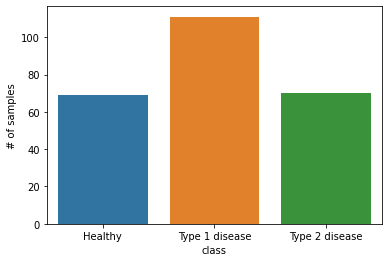

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='class',data=df_train)
plt.xlabel('class')
plt.ylabel('# of samples')
plt.xticks([0,1,2],['Healthy','Type 1 disease','Type 2 disease'])
plt.show()

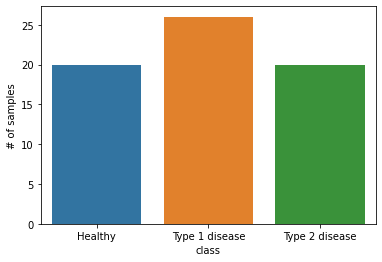

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='class',data=df_test)
plt.xlabel('class')
plt.ylabel('# of samples')
plt.xticks([0,1,2],['Healthy','Type 1 disease','Type 2 disease'])
plt.show()

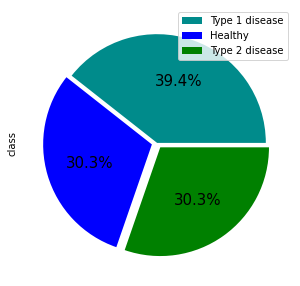

In [ ]:
plt.figure(figsize=(7,5))
df_test['class'].value_counts().plot(kind='pie',labels = ['','',''], autopct='%1.1f%%', colors = ['darkcyan','blue','green'], explode = [0,0.05,0.05], textprops = {"fontsize":15})
plt.legend(labels=['Type 1 disease', 'Healthy','Type 2 disease'])
plt.show()

In [ ]:
print('Train Set - Healthy')
plt.figure(figsize=(12,12))
for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_Healthy[i])
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()

Train Set - Healthy


NameError: ignored

Test Set - Type 1 diseases


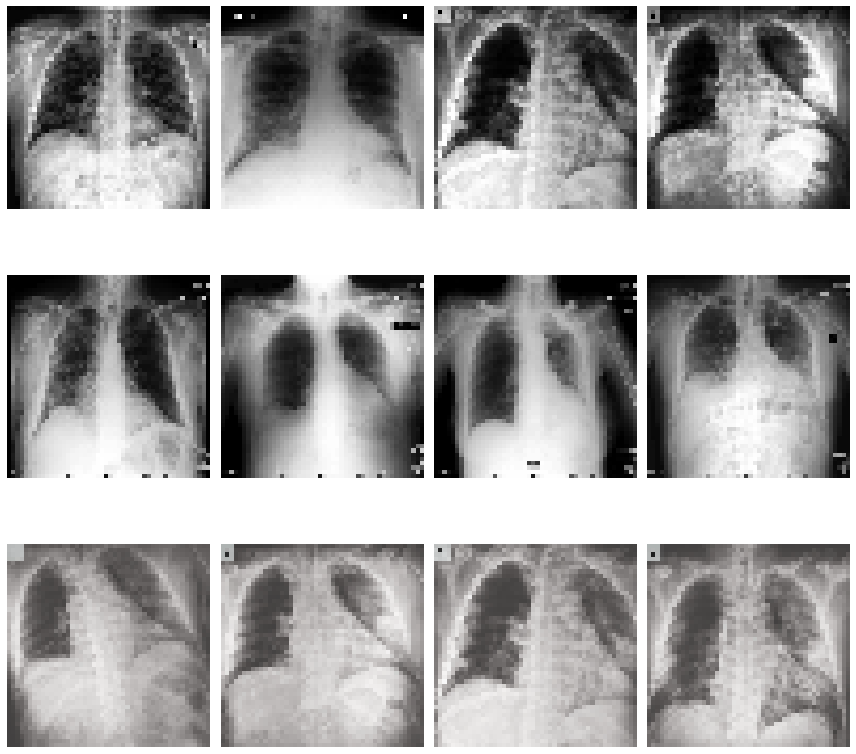

In [ ]:
print('Test Set - Type 1 diseases')
plt.figure(figsize=(12,12))
for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_Type_1[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()

Train Set - Type 1 diseases


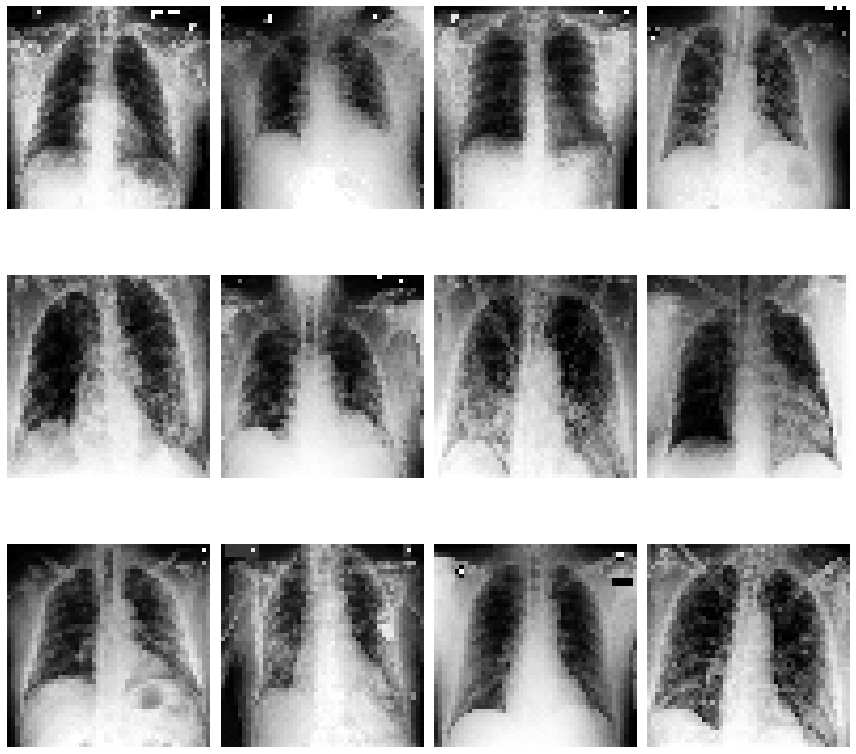

In [ ]:
print('Train Set - Type 1 diseases')
plt.figure(figsize=(12,12))
for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_Type_1[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()

Test Set - Healthy


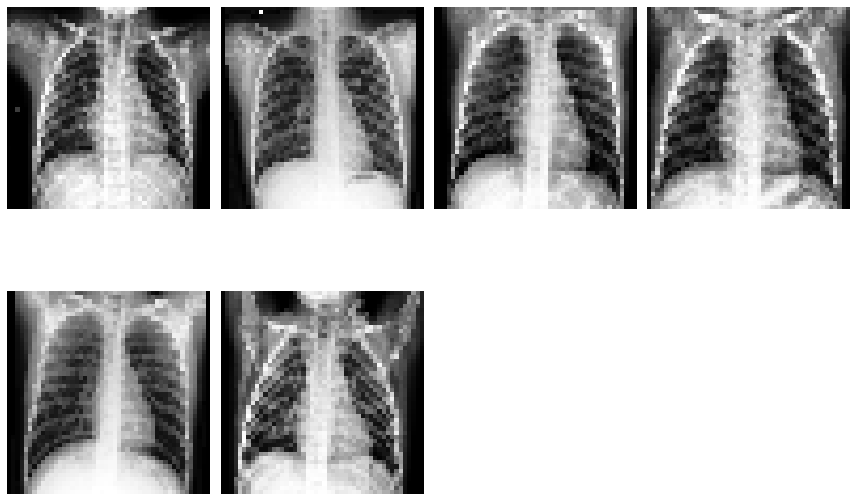

In [ ]:
print('Test Set - Healthy')
plt.figure(figsize=(12,12))
for i in range(0, 6):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_Healthy[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()

Train Set - Type 2 diseases


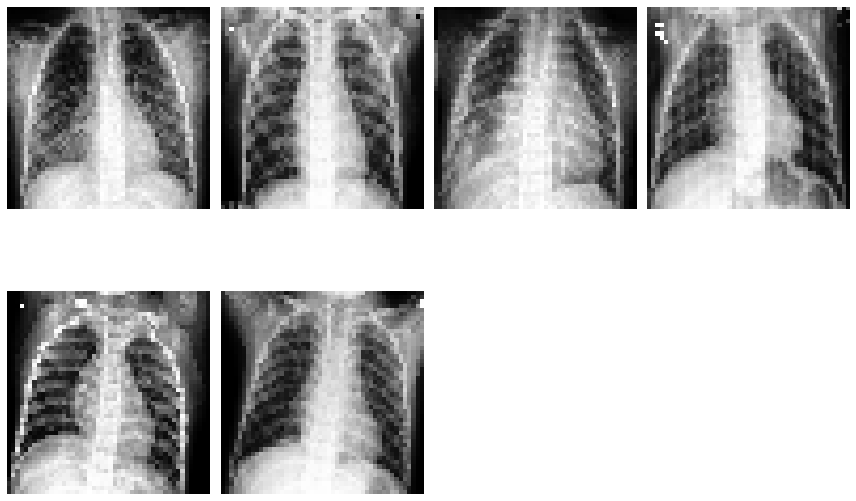

In [ ]:
print('Train Set - Type 2 diseases')
plt.figure(figsize=(12,12))
for i in range(0, 6):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_Type_2[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()

Test Set - Type 2 diseases


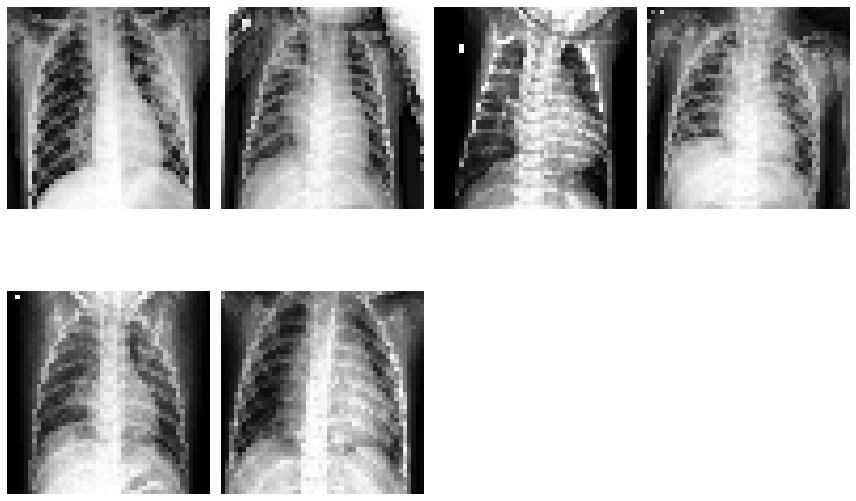

In [ ]:
print('Test Set - Type 2 diseases')
plt.figure(figsize=(12,12))
for i in range(0, 6):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_Type_2[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255.,zoom_range=0.1,
                                 rotation_range=0.1,width_shift_range=0.1,
                                 height_shift_range=0.1,horizontal_flip=True,
                                 vertical_flip=True)

test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
ds_train=train_datagen.flow_from_dataframe(df_train,x_col='image',
                                           y_col='class',
                                           target_size=(IMG_SIZE,IMG_SIZE),
                                           batch_size=BATCH,seed=SEED)


ds_test=test_datagen.flow_from_dataframe(df_test,x_col='image',
                                           y_col='class',
                                           target_size=(IMG_SIZE,IMG_SIZE),
                                           batch_size=BATCH, seed=SEED)


Found 250 validated image filenames belonging to 3 classes.
Found 66 validated image filenames belonging to 3 classes.


In [ ]:
early_stopping=callbacks.EarlyStopping(monitor='val_loss',patience=2,
                                       restore_best_weights=True)

In [ ]:
def get_model():
  inputs=layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))

  x=layers.Conv2D(filter=16,kernel_size=3,padding='valid')(inputs)
  x=layers.BatchNormalization()(x)
  x=layers.Activation('relu')(x)
  x=layers.MaxPool2D()(x)
  x=layers.Dropout(0.2)(x)

  x=layers.Conv2D(filter=32,kernel_size=3,padding='valid')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Activation('relu')(x)
  x=layers.MaxPool2D()(x)
  x=layers.Dropout(0.2)(x)

  x=layers.Conv2D(filter=64,kernel_size=3,padding='valid')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Activation('relu')(x)
  x=layers.MaxPool2D()(x)
  x=layers.Dropout(0.4)(x)

  x=layers.flatten(x)
  x=layers.Dense(64,activation='relu')(x)
  x=layers.Dropout(0.5)(x)
  output=layers.Dense(3,activation='softmax')(x)

  model=keras.Model(inputs=inputs,outputs=output)
  return model

In [ ]:
# model
def get_model():
  inputs=layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))
  # Block 1
  x=layers.Conv2D(filters=16,kernel_size=3,padding='valid')(inputs)
  x=layers.BatchNormalization()(x)
  x=layers.Activation('relu')(x)
  x=layers.MaxPool2D()(x)
  x=layers.Dropout(0.2)(x)

  # Block 2
  x=layers.Conv2D(filters=32,kernel_size=3,padding='valid')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Activation('relu')(x)
  x=layers.MaxPool2D()(x)
  x=layers.Dropout(0.2)(x)

 # Block 3
  x=layers.Conv2D(filters=64,kernel_size=3,padding='valid')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Activation('relu')(x)
  x=layers.MaxPool2D()(x)
  x=layers.Dropout(0.4)(x)
  # FCN
  x=layers.Flatten()(x)
  x=layers.Dense(64,activation='relu')(x)
  x=layers.Dropout(0.5)(x)
  output=layers.Dense(3,activation='softmax')(x)
  model=keras.Model(inputs=[inputs],outputs=output)


  return model





In [ ]:
model=get_model()
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 46, 46, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 16)       64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 46, 46, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 16)        0     

In [ ]:
history=model.fit(ds_train,batch_size=BATCH,
                  epochs=10,validation_data=ds_test,
                  #callbacks=[early_stopping]
                  steps_per_epoch=(len(df_train)/BATCH),
                  validation_steps=(len(df_test)/BATCH))



Epoch 1/10
7/7 [==============================] - 154s 18s/step - loss: 2.0203 - accuracy: 0.4400 - val_loss: 1.0948 - val_accuracy: 0.3636
Epoch 2/10
7/7 [==============================] - 12s 2s/step - loss: 1.1549 - accuracy: 0.4800 - val_loss: 1.0849 - val_accuracy: 0.5606
Epoch 3/10
7/7 [==============================] - 11s 1s/step - loss: 0.9363 - accuracy: 0.5640 - val_loss: 1.0723 - val_accuracy: 0.3939
Epoch 4/10
7/7 [==============================] - 11s 1s/step - loss: 0.8501 - accuracy: 0.6160 - val_loss: 1.1096 - val_accuracy: 0.3939
Epoch 5/10
7/7 [==============================] - 11s 1s/step - loss: 0.7616 - accuracy: 0.6680 - val_loss: 1.4196 - val_accuracy: 0.3939
Epoch 6/10
7/7 [==============================] - 11s 1s/step - loss: 0.7314 - accuracy: 0.6800 - val_loss: 1.6657 - val_accuracy: 0.3939
Epoch 7/10
7/7 [==============================] - 11s 1s/step - loss: 0.7449 - accuracy: 0.6760 - val_loss: 2.2597 - val_accuracy: 0.3939
Epoch 8/10
7/7 [================

In [ ]:
model.save('CNN1.h5')

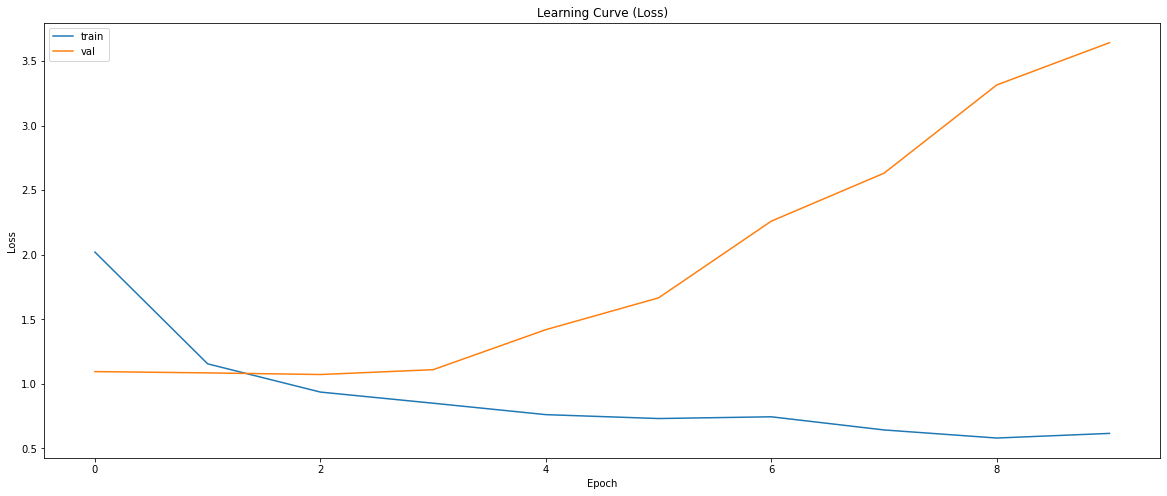

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
#ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

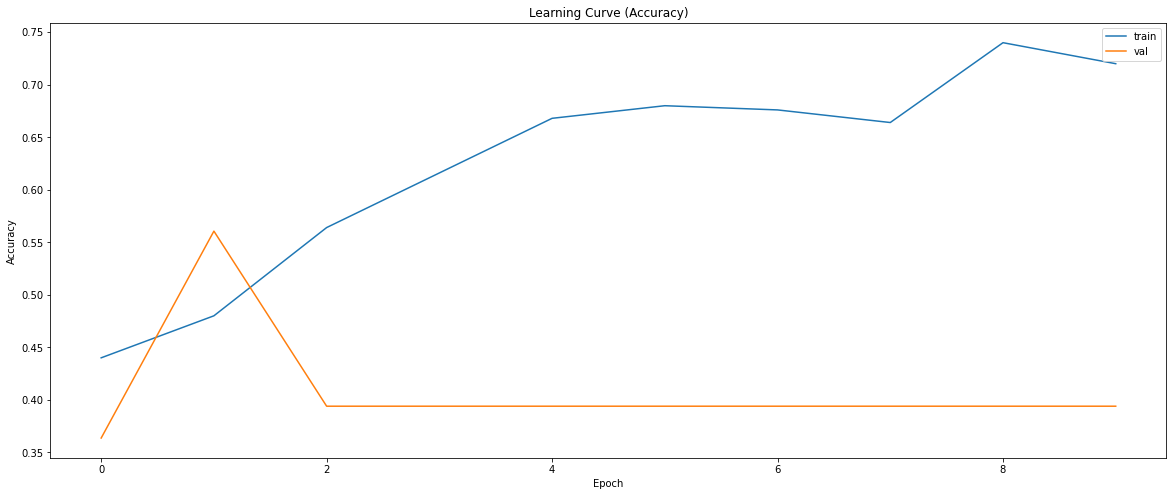

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
#ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()


In [ ]:
score = model.evaluate(ds_test, steps = len(df_test)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 3.6416661739349365
Val accuracy: 0.39393940567970276


In [ ]:
Mobilenet_model=tf.keras.applications.MobileNetV2(weights="imagenet",
                                             input_shape=(IMG_SIZE,IMG_SIZE,3),
                                             include_top=False)
Mobilenet_model.trainable = False

In [ ]:
Mobilenet_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [ ]:
for layer in Mobilenet_model.layers:
  print(layer,layer.trainable)


<keras.engine.input_layer.InputLayer object at 0x7ff9babaacd0> False
<keras.layers.convolutional.Conv2D object at 0x7ff956039990> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7ff956031b10> False
<keras.layers.advanced_activations.ReLU object at 0x7ff9ba850590> False
<keras.layers.convolutional.DepthwiseConv2D object at 0x7ff9baa44190> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7ff9baf00f50> False
<keras.layers.advanced_activations.ReLU object at 0x7ff9560308d0> False
<keras.layers.convolutional.Conv2D object at 0x7ff93f3cd8d0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7ff9bf7d53d0> False
<keras.layers.convolutional.Conv2D object at 0x7ff93f3e2b90> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7ff956110a50> False
<keras.layers.advanced_activations.ReLU object at 0x7ff93f372e10> False
<keras.layers.convolutional.ZeroPadding2D 

In [ ]:
from tensorflow.keras import Sequential

In [ ]:
model2=Sequential()

model2.add(Mobilenet_model)

model2.add(layers.Flatten())
model2.add(layers.Dense(1024,activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(3,activation='softmax'))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 2, 2, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 5120)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              5243904   
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 7,504,963
Trainable params: 5,246,979
Non-trainable params: 2,257,984
____________________________________

In [ ]:
model2.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
history=model2.fit(ds_train,batch_size=BATCH,
                  epochs=15,validation_data=ds_test,
                  #callbacks=[early_stopping]
                  steps_per_epoch=(len(df_train)/BATCH),
                  validation_steps=(len(df_test)/BATCH))


Epoch 1/15
7/7 [==============================] - 13s 2s/step - loss: 1.6256 - accuracy: 0.7360 - val_loss: 1.3098 - val_accuracy: 0.7576
Epoch 2/15
7/7 [==============================] - 11s 1s/step - loss: 0.9141 - accuracy: 0.7640 - val_loss: 0.6971 - val_accuracy: 0.7879
Epoch 3/15
7/7 [==============================] - 11s 1s/step - loss: 0.8651 - accuracy: 0.7880 - val_loss: 1.0674 - val_accuracy: 0.6818
Epoch 4/15
7/7 [==============================] - 11s 1s/step - loss: 0.6724 - accuracy: 0.8440 - val_loss: 0.4195 - val_accuracy: 0.8333
Epoch 5/15
7/7 [==============================] - 12s 2s/step - loss: 0.7159 - accuracy: 0.8280 - val_loss: 0.4889 - val_accuracy: 0.7727
Epoch 6/15
7/7 [==============================] - 11s 1s/step - loss: 0.6812 - accuracy: 0.8280 - val_loss: 0.7245 - val_accuracy: 0.7424
Epoch 7/15
7/7 [==============================] - 11s 1s/step - loss: 0.3409 - accuracy: 0.8760 - val_loss: 0.6961 - val_accuracy: 0.7879
Epoch 8/15
7/7 [==================

In [ ]:
model2.save('/content/drive/MyDrive/Colab Notebooks/data')

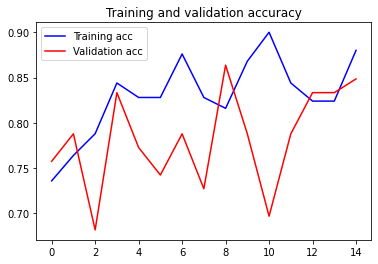

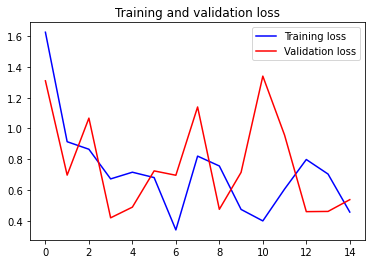

In [ ]:
# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(15)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
score = model2.evaluate(ds_test, steps = len(df_test)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.5374109148979187
Val accuracy: 0.8484848737716675


In [ ]:
Densenet_model=tf.keras.applications.DenseNet121(weights="imagenet",
                                             input_shape=(IMG_SIZE,IMG_SIZE,3),
                                             include_top=False)

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
Densenet_model.trainable=False

In [ ]:
Densenet_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 54, 54, 3)   0           ['input_4[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 24, 24, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1/conv[0][0]']             
                                                                                        

In [ ]:
model3=Sequential()

model3.add(Densenet_model)

model3.add(layers.Flatten())
model3.add(layers.Dense(1024,activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(3,activation='softmax'))

model3.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 3)                 3075      
                                                                 
Total params: 8,090,179
Trainable params: 1,052,675
Non-trainable params: 7,037,504
_________________________________________________________________


In [ ]:
model3.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
history=model3.fit(ds_train,batch_size=BATCH,
                  epochs=15,validation_data=ds_test,
                  #callbacks=[early_stopping]
                  steps_per_epoch=(len(df_train)/BATCH),
                  validation_steps=(len(df_test)/BATCH))


Epoch 1/15
7/7 [==============================] - 21s 2s/step - loss: 2.2597 - accuracy: 0.5440 - val_loss: 0.5836 - val_accuracy: 0.7727
Epoch 2/15
7/7 [==============================] - 11s 1s/step - loss: 0.6217 - accuracy: 0.7480 - val_loss: 0.6625 - val_accuracy: 0.6970
Epoch 3/15
7/7 [==============================] - 11s 1s/step - loss: 0.6087 - accuracy: 0.7720 - val_loss: 0.4937 - val_accuracy: 0.8182
Epoch 4/15
7/7 [==============================] - 13s 2s/step - loss: 0.7897 - accuracy: 0.7560 - val_loss: 0.9045 - val_accuracy: 0.6515
Epoch 5/15
7/7 [==============================] - 11s 1s/step - loss: 0.5491 - accuracy: 0.8240 - val_loss: 0.4962 - val_accuracy: 0.8182
Epoch 6/15
7/7 [==============================] - 11s 2s/step - loss: 0.4437 - accuracy: 0.8160 - val_loss: 0.7785 - val_accuracy: 0.7424
Epoch 7/15
7/7 [==============================] - 11s 1s/step - loss: 0.3870 - accuracy: 0.8480 - val_loss: 0.6208 - val_accuracy: 0.7879
Epoch 8/15
7/7 [==================

In [ ]:
score = model3.evaluate(ds_test, steps = len(df_test)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.3403722047805786
Val accuracy: 0.8484848737716675


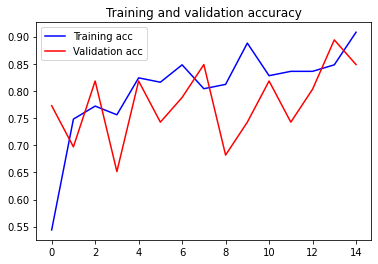

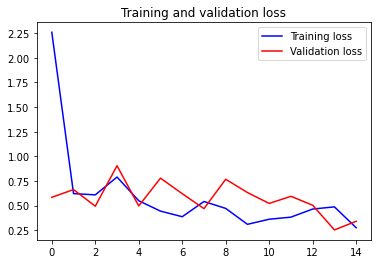

In [ ]:
# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(15)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
df_test

,class,image
0,Healthy,/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0101.jpeg
1,Healthy,/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0102.jpeg
2,Healthy,/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0103.jpeg
3,Healthy,/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0105.jpeg
4,Healthy,/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0106.jpeg
...,...,...
61,Type 2 disease,/content/drive/MyDrive/Colab Notebooks/data/test/Type 2 disease/0116.jpeg
62,Type 2 disease,/content/drive/MyDrive/Colab Notebooks/data/test/Type 2 disease/0117.jpeg
63,Type 2 disease,/content/drive/MyDrive/Colab Notebooks/data/test/Type 2 disease/0118.jpeg
64,Type 2 disease,/content/drive/MyDrive/Colab Notebooks/data/test/Type 2 disease/0119.jpeg


In [ ]:
num_label={'Healthy':0,'Type 1 disease':1,'Type 2 disease':2}
Y_test=df_test['class'].copy().map(num_label).astype('int')


In [ ]:
Y_test

0     0
1     0
2     0
3     0
4     0
     ..
61    2
62    2
63    2
64    2
65    2
Name: class, Length: 66, dtype: int64

In [ ]:
y_pred=np.argmax(model3.predict(ds_test),axis=1)
y_pred

array([1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1,
       2, 2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0,
       1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 0])

In [ ]:
y_pred=np.argmax(model3.predict(ds_test),axis=-1)
y_pred

array([1, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0,
       1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1])

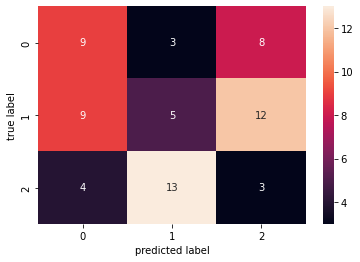

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.41      0.45      0.43        20
           1       0.24      0.19      0.21        26
           2       0.13      0.15      0.14        20

    accuracy                           0.26        66
   macro avg       0.26      0.26      0.26        66
weighted avg       0.26      0.26      0.26        66



In [ ]:
ds_test.filenames

['/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0101.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0102.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0103.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0105.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0106.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0107.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0108.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0109.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0110.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0111.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0112.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0114.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0115.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0116.jpeg',
 '/con

In [ ]:
ds_test.reset
pred=np.argmax(model3.predict_generator(ds_test),axis=1)
df=pd.DataFrame({'filename':ds_test.filenames,'predict':pred,'actual':ds_test.classes})

In [ ]:
df

,filename,predict,actual
0,/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0101.jpeg,2,0
1,/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0102.jpeg,0,0
2,/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0103.jpeg,0,0
3,/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0105.jpeg,1,0
4,/content/drive/MyDrive/Colab Notebooks/data/test/Healthy/0106.jpeg,2,0
...,...,...,...
61,/content/drive/MyDrive/Colab Notebooks/data/test/Type 2 disease/0116.jpeg,0,2
62,/content/drive/MyDrive/Colab Notebooks/data/test/Type 2 disease/0117.jpeg,0,2
63,/content/drive/MyDrive/Colab Notebooks/data/test/Type 2 disease/0118.jpeg,2,2
64,/content/drive/MyDrive/Colab Notebooks/data/test/Type 2 disease/0119.jpeg,2,2


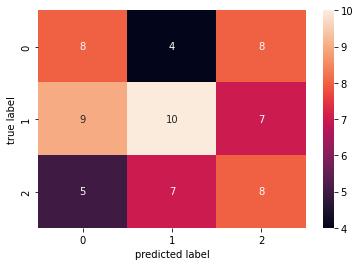

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df.actual,df.predict)
sns.heatmap(cm,annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()